In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#CITE

Lichtinghagen, R., Klawonn, F., & Hoffmann, G. (2020). HCV data [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5D612.

In [ ]:
import pandas as pd

# Download the dataset from UCI Machine Learning Repository
!wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv

# Load the dataset
df = pd.read_csv('hcvdat0.csv')

# Calculate and print the sum of missing values for each column
print("Missing values per column:")
print(df.isnull().sum())

# Display the summary statistics for numerical columns
print("\nSummary Statistics:")
df.describe()

--2026-02-19 18:46:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘hcvdat0.csv’

hcvdat0.csv             [ <=>                ]  45.10K  --.-KB/s    in 0.05s   

Last-modified header missing -- time-stamps turned off.
2026-02-19 18:47:00 (856 KB/s) - ‘hcvdat0.csv’ saved [46183]

Missing values per column:
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

Summary Statistics:


,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Exploratory Data Analysis (EDA)

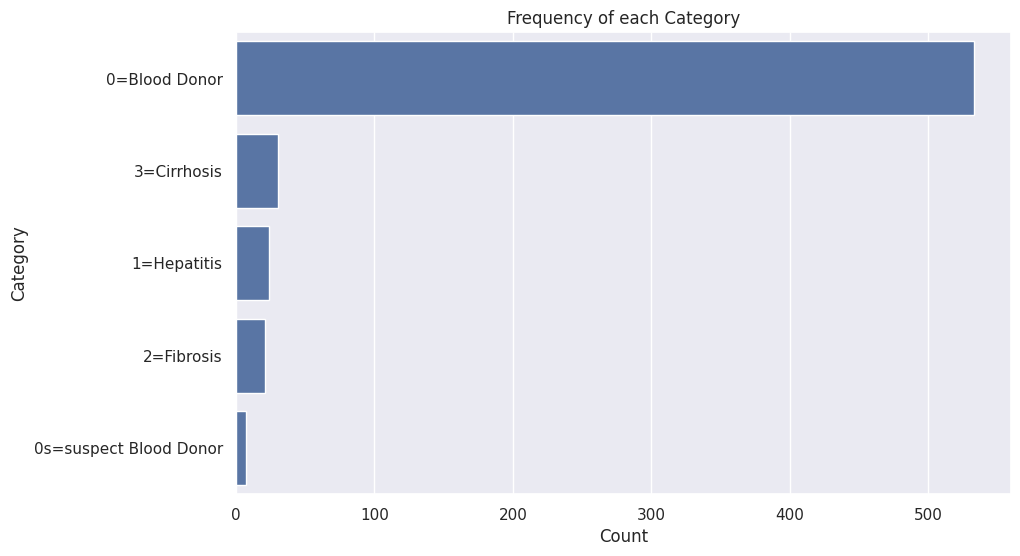

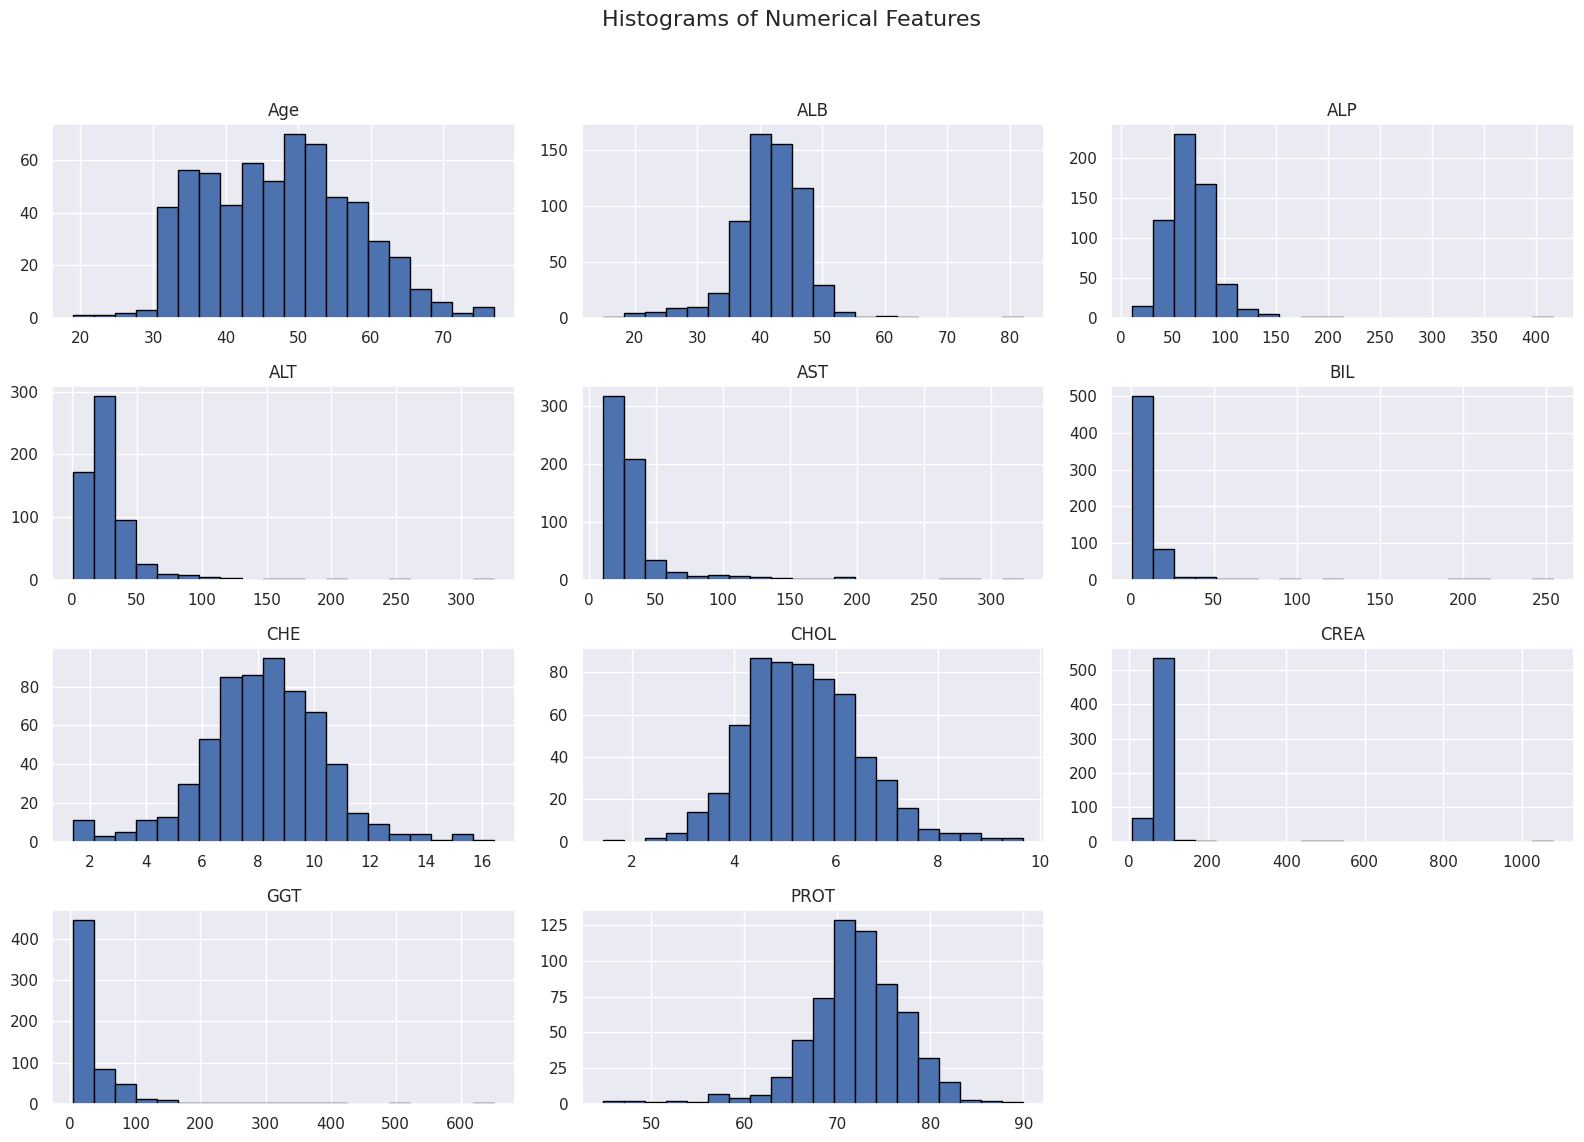

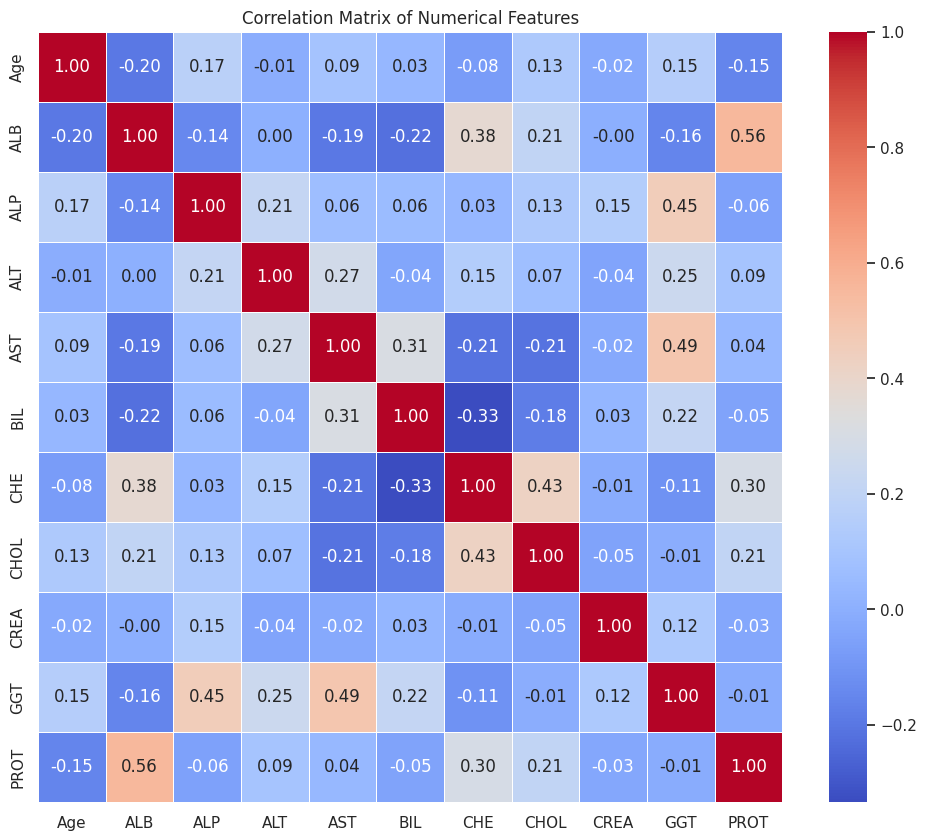

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="darkgrid")

# Count plot for 'Category'
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Frequency of each Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Histograms for numerical columns
# Select numerical columns, excluding 'Unnamed: 0' as it is an index
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = [col for col in numerical_cols if col != 'Unnamed: 0']

# Plot histograms
df[numerical_cols].hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Correlation matrix and heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Remove the unnecessary 'Unnamed: 0' column
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Handle missing values in numerical columns by filling with mean
# Note: specifically for ALB, ALP, ALT, CHOL, PROT as mentioned, but we can apply to all numeric columns containing NaNs
numeric_cols_with_nan = ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']
for col in numeric_cols_with_nan:
    df[col] = df[col].fillna(df[col].mean())

# Encode 'Sex' column
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

# Encode 'Category' target variable
le_category = LabelEncoder()
df['Category'] = le_category.fit_transform(df['Category'])

# Define feature matrix X and target vector y
X = df.drop('Category', axis=1)
y = df['Category']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing complete.")
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Data preprocessing complete.
Shape of X_train_scaled: (492, 12)
Shape of X_test_scaled: (123, 12)


## Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        96
           1       0.50      0.67      0.57         3
           2       1.00      0.33      0.50         9
           3       0.60      0.50      0.55         6
           4       1.00      0.67      0.80         9

    accuracy                           0.89       123
   macro avg       0.80      0.63      0.67       123
weighted avg       0.90      0.89      0.88       123



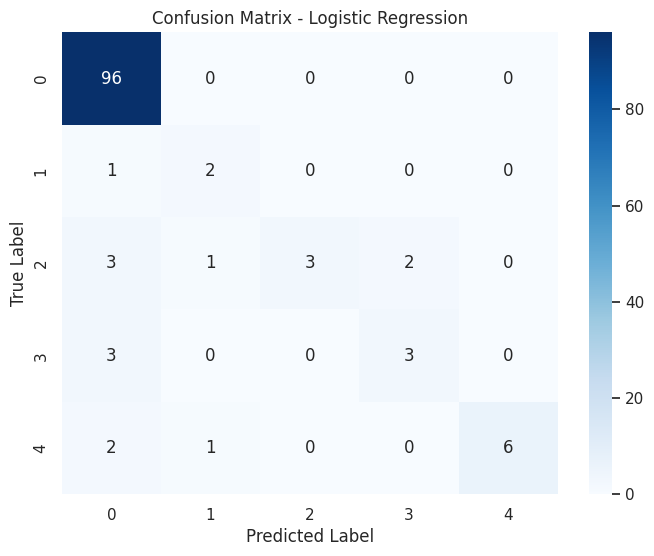

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate the Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the training data
lr.fit(X_train_scaled, y_train)

# Predict categories for the test set
y_pred_lr = lr.predict(X_test_scaled)

# Print the classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Compute and visualize the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Random Forest

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        96
           1       0.00      0.00      0.00         3
           2       1.00      0.22      0.36         9
           3       0.50      0.33      0.40         6
           4       0.86      0.67      0.75         9

    accuracy                           0.86       123
   macro avg       0.65      0.44      0.49       123
weighted avg       0.84      0.86      0.83       123



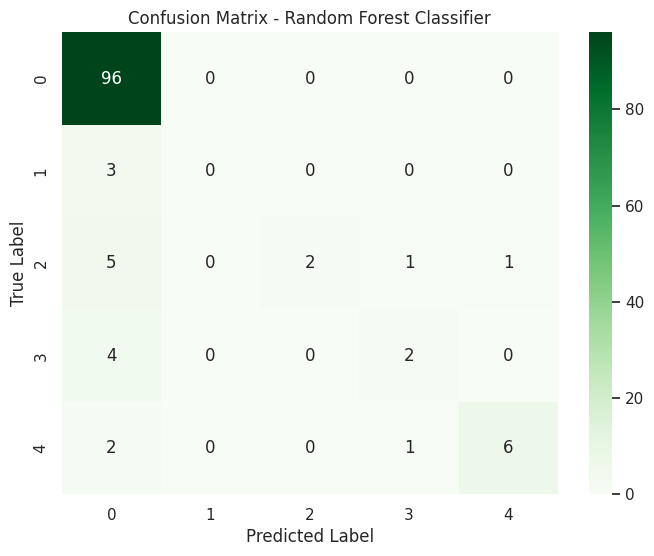

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf.fit(X_train_scaled, y_train)

# Predict categories for the test set
y_pred_rf = rf.predict(X_test_scaled)

# Print the classification report
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Compute and visualize the confusion matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Data Quality and Preprocessing**:
    *   The dataset contained missing values, most notably 18 in `ALP` and 10 in `CHOL`, which were imputed using the mean.
    *   The data was split into a training set of **492** samples and a testing set of **123** samples.
    *   Numerical features were standardized, and categorical variables ('Sex', 'Category') were encoded for modeling.

*   **Logistic Regression Performance**:
    *   Achieved an overall accuracy of **89%**.
    *   Demonstrated strong performance on the majority class (Class 0) with a **Precision of 0.91** and **Recall of 1.00**.
    *   Performance on minority classes (disease states) was moderate, with F1-scores ranging from **0.50 to 0.80**.

*   **Random Forest Classifier Performance**:
    *   Achieved a slightly lower overall accuracy of **86%**.
    *   Struggled significantly with minority classes compared to the baseline; specifically, it failed to identify any instances of Class 1 (**Precision and Recall of 0.00**).
    *   Maintained excellent Recall (**1.00**) for the majority class (Class 0) but showed high bias toward it.

### Insights or Next Steps

*   **Class Imbalance Impact**: Both models show a strong bias toward the majority class (Class 0). The high overall accuracy masks the poor performance in detecting specific disease categories. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights are necessary to improve sensitivity for minority classes.
*   **Model Selection**: The simpler Logistic Regression model outperformed the Random Forest Classifier on this dataset, particularly for minority classes. This suggests that the relationship between features and the target might be effectively linear, or that the Random Forest requires hyperparameter tuning (e.g., tree depth, class weights) to handle the limited data in minority groups effectively.
